# Forecasting and Anomaly Surveillance Terminal 

## Data Retrieval

### Import needed Python packages

In [2]:
#matplotlib inline
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Retrieve data from Yahoo's Finance API

In [3]:
symbols = ['AMZN','AAPL','GOOGL','INTC','MSFT']

start = dt.datetime(2016, 6, 1)
end = dt.datetime(2017, 6, 30)

volume = []
closes = []
for symbol in symbols:
    print( symbol)
    vdata = pdr.get_data_yahoo(symbol, start, end)
    cdata = vdata[['Close']]
    closes.append(cdata)
    vdata = vdata[['Volume']]
    volume.append(vdata)

AMZN
AAPL
GOOGL
INTC
MSFT


### Create dataframes of stock price data

In [4]:
volume = pd.concat(volume, axis = 1).dropna()
volume.columns = symbols
volume.head()

,AMZN,AAPL,GOOGL,INTC,MSFT
Date,,,,,
2016-06-01,3263100,29173300,1039400,17753500,25324800
2016-06-02,3026600,40191600,1695800,14140100,22840800
2016-06-03,3367300,28062900,1230400,15741800,23081300
2016-06-06,2704800,23292500,1499600,15139600,18243300
2016-06-07,2732500,22409500,1215700,19339100,20866800


In [6]:
closes = pd.concat(closes, axis = 1).dropna()
closes.columns = symbols
closes.head()

,AMZN,AAPL,GOOGL,INTC,MSFT
Date,,,,,
2016-06-01,719.440002,98.459999,748.460022,31.660000,52.849998
2016-06-02,728.239990,97.720001,744.270020,31.760000,52.480000
2016-06-03,725.539978,97.919998,735.859985,31.620001,51.790001
2016-06-06,726.729980,98.629997,730.059998,31.680000,52.130001
2016-06-07,723.739990,99.029999,731.090027,31.879999,52.099998


In [17]:
len(closes['AMZN'])

274

## Exploratory Analysis  

#### Time Series plot of daily closing prices for 5 symbols

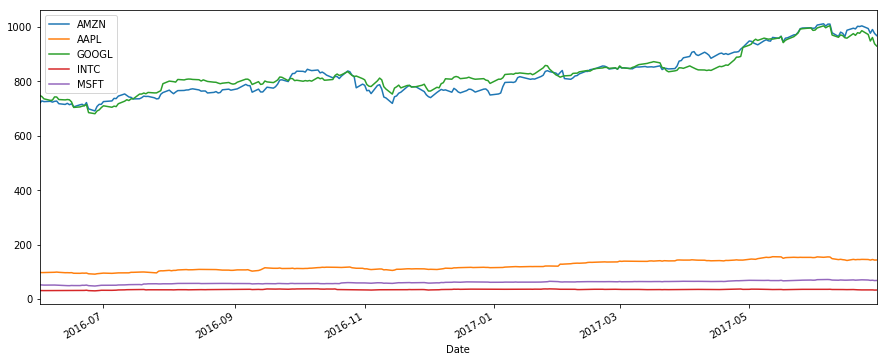

In [7]:
closes.plot(figsize=(15, 6))
plt.show()

#### Time Series plot of daily trading volume for 5 symbols

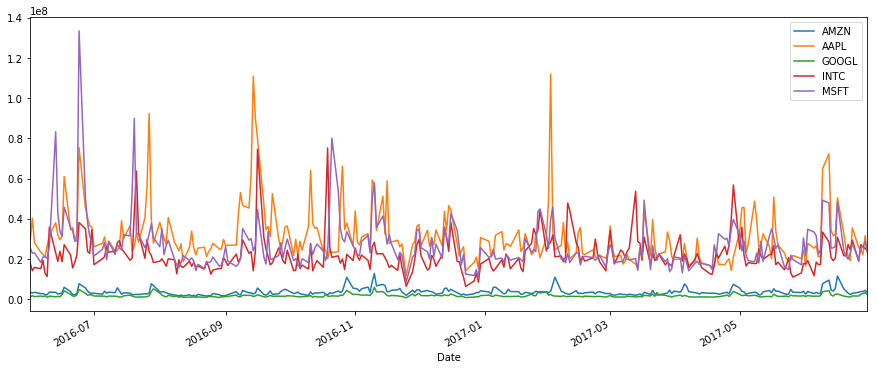

In [8]:
volume.plot(figsize=(15, 6))
plt.show()

In [9]:
irate = pd.read_csv('./data/irate.csv')
irate.Date = pd.to_datetime(irate.Date)
irate.head(10)


,Date,Rate
0,2016-06-01,0.36
1,2016-06-08,0.37
2,2016-06-15,0.37
3,2016-06-22,0.38
4,2016-06-29,0.40
5,2016-07-06,0.39
6,2016-07-13,0.40
7,2016-07-20,0.40
8,2016-07-27,0.40
9,2016-08-03,0.36


#### Performing over-sampling, a type of imputation, in order for our interest rate data to have the same frequency as our stock price data.

In [11]:
# reproducing the weekly value for each day of the week
weekly= irate['Rate']
daily=[]
for item in weekly:
    copies=[item]*5
    daily=daily+copies

In [20]:
irateD = pd.DataFrame()
weeklyD= irate['Date']
dailyD=[]
for item in weeklyD:
    for n in range(5) : 
        newday=item + timedelta(days = n)
        dailyD.append(newday)

irateD['Date'] = dailyD
irateD['Int_Rate'] = daily
irateD.Date = pd.to_datetime(irateD.Date)
irateD=irateD[0:274]
print("Total number of values",len(irateD.Date))

irateD.head()

('Total number of values', 274)


,Date,Int_Rate
0,2016-06-01,0.36
1,2016-06-02,0.36
2,2016-06-03,0.36
3,2016-06-04,0.36
4,2016-06-05,0.36


### Time Series plot of interest rate

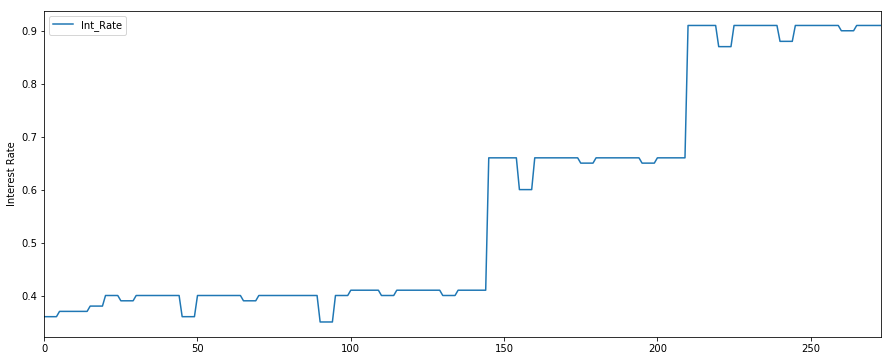

In [21]:
irateD.plot(figsize=(15, 6))
plt.ylabel('Interest Rate')
plt.show()

### Time Series plot of sentiment index

In [22]:
# Monthly market sentiment index

sindex = pd.read_csv('./data/sindex.csv')
sindex.Date = pd.to_datetime(sindex.Date)
sindex.head()

,Date,Sent. Index
0,2015-06-01,96.1
1,2015-07-01,93.1
2,2015-08-01,91.9
3,2015-09-01,87.2
4,2015-10-01,90.0


### Imputing monthly sentiment index data to increase its frequency to daily

In [23]:
mdays = [30,31,31,30,31,30,31,31,28,31,30,31,30] #days in each month
wdays = [22,20,23,21,20,20,21,20,19,23,20,22,22] #days in each month
weeklysi= sindex['Sent. Index']
dailysi=[]
indexn=0
for item in wdays:  # one item per month
    copies = [weeklysi.iloc[indexn]] * item
    indexn+=1
    dailysi=dailysi+copies
for n in range(4):
    dailysi+=[93.5]
dailysi=dailysi[0:274]    
print(dailysi[0:6])
print("Total number of values", len(dailysi))

[96.099999999999994, 96.099999999999994, 96.099999999999994, 96.099999999999994, 96.099999999999994, 96.099999999999994]
('Total number of values', 274)


In [24]:
irateD['Sent_Index']=dailysi
irateD.head()

,Date,Int_Rate,Sent_Index
0,2016-06-01,0.36,96.1
1,2016-06-02,0.36,96.1
2,2016-06-03,0.36,96.1
3,2016-06-04,0.36,96.1
4,2016-06-05,0.36,96.1


In [26]:
fullir=irateD.copy()
full=closes.copy()

In [32]:
full['Int_Rate']=list(irateD['Int_Rate'])
full['Sent_Index']=list(irateD['Sent_Index'])

In [33]:
full.head()

,AMZN,AAPL,GOOGL,INTC,MSFT,Int_Rate,Sent_Index
Date,,,,,,,
2016-06-01,719.440002,98.459999,748.460022,31.660000,52.849998,0.36,96.1
2016-06-02,728.239990,97.720001,744.270020,31.760000,52.480000,0.36,96.1
2016-06-03,725.539978,97.919998,735.859985,31.620001,51.790001,0.36,96.1
2016-06-06,726.729980,98.629997,730.059998,31.680000,52.130001,0.36,96.1
2016-06-07,723.739990,99.029999,731.090027,31.879999,52.099998,0.36,96.1


### Forecasting Model

### Anomaly Detection

In [ ]:
from slicematrixIO import SliceMatrix

In [39]:
# create slicematrix account to get your API key, confirmation e-mail took hours
# pip install slicematrixIO
# slicematrixIO only runs on Python 2 as of July 2017
from slicematrixIO import SliceMatrix

api_key = "oABo7H3NCD37pTlIfcXKS2u7LDtmLjLp7TFlaFnK"
sm = SliceMatrix(api_key)

In [40]:
 %matplotlib inline
# import pandas as pd
# import pandas_datareader as pdr
# import datetime as dt
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.collections as collections

In [41]:
# split the dataset
df_training = closes.ix[0:200,0:5]
df_testing  = closes.ix[200:,0:5]

In [42]:
df_training.head()

,AMZN,AAPL,GOOGL,INTC,MSFT
Date,,,,,
2016-06-01,719.440002,98.459999,748.460022,31.660000,52.849998
2016-06-02,728.239990,97.720001,744.270020,31.760000,52.480000
2016-06-03,725.539978,97.919998,735.859985,31.620001,51.790001
2016-06-06,726.729980,98.629997,730.059998,31.680000,52.130001
2016-06-07,723.739990,99.029999,731.090027,31.879999,52.099998


In [62]:
# Training Model
# isolation forest multivariate anomaly detector
# Rate of 0.008 is equal to once every 125 days
# Rate of 0.005 is equal to once every 200 days
iso_forest_live_model2 = sm.IsolationForest(dataset = df_training, rate = 0.008)
iso_forest_live_model1 = sm.IsolationForest(dataset = df_training, rate = 0.005)

In [63]:
# Applying Model to unseen data
out_of_sample_scores2  = iso_forest_live_model2.score(df_testing.values.tolist())
out_of_sample_scores1  = iso_forest_live_model1.score(df_testing.values.tolist())

In [65]:
out_of_sample_scores2  = pd.DataFrame(out_of_sample_scores2, columns = ['scores'])
out_of_sample_scores1  = pd.DataFrame(out_of_sample_scores1, columns = ['scores'])
out_of_sample_scores2.tail()
out_of_sample_scores1.tail()

,scores
69,-1
70,-1
71,-1
72,-1
73,-1


In [66]:
def draw_anomaly_plot(scores, volume, title, lw = 2):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(title)

    ax.plot(scores.index.values, volume.sum(axis = 1), color='black')
    ax.axhline(0, color='black', lw=2)

    for i in range(0, scores.shape[0]):
        score = scores.ix[i]
        if score[0] < 0:
            l = plt.axvline(x=i, color='red', alpha=0.25, lw = lw)

    plt.show()

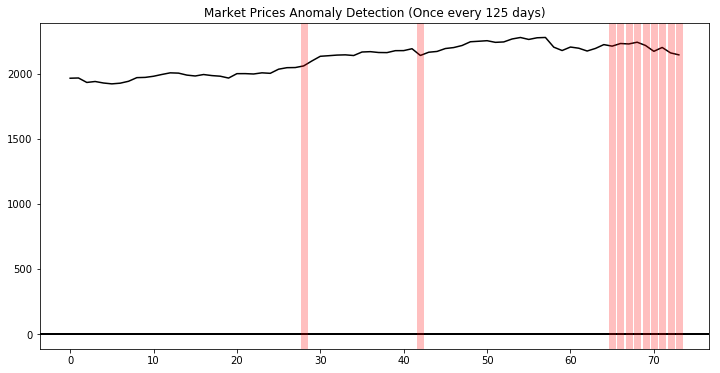

In [69]:
draw_anomaly_plot(out_of_sample_scores2, df_testing, 'Market Prices Anomaly Detection (Once every 125 days)', lw = 7)

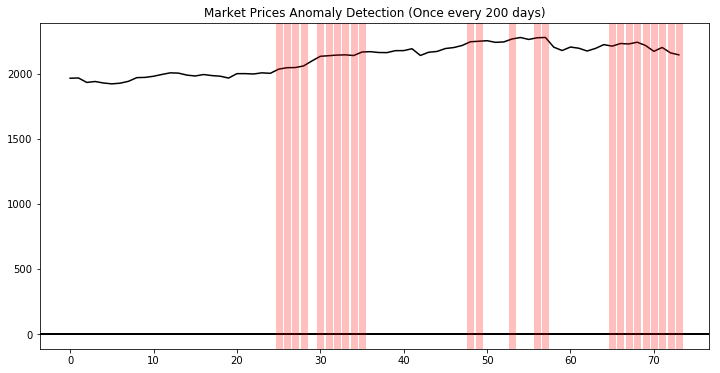

In [70]:
draw_anomaly_plot(out_of_sample_scores1, df_testing, 'Market Prices Anomaly Detection (Once every 200 days)', lw = 7)

In [78]:
# Volume Anomaly Detection

df = volume.ix[:,:]
# Training Model
# isolation forest multivariate anomaly detector
iso_forest_live_model2 = sm.IsolationForest(dataset = df, rate = 0.01)

In [79]:
# Applying Model to unseen data, once every 5 days (0.2), and once every 10 days (0.1)
scores  = iso_forest_live_model2.score(df.values.tolist())
scores  = pd.DataFrame(scores, columns = ['scores'])
scores.tail()

,scores
269,1
270,1
271,1
272,1
273,1


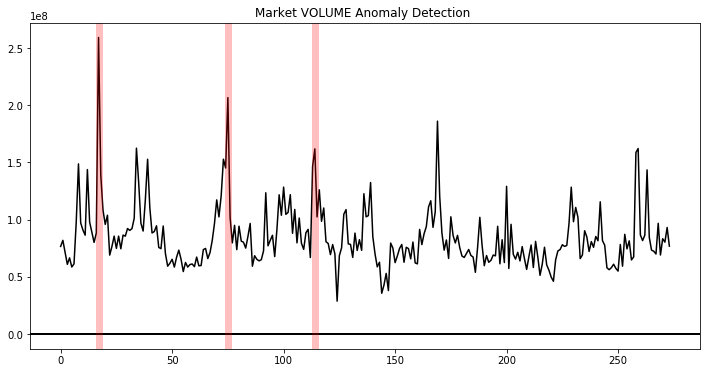

In [80]:
draw_anomaly_plot(scores, df, 'Market VOLUME Anomaly Detection ', lw = 7)